<a href="https://colab.research.google.com/github/alqamahansari/ML-Internship-Daily-Activities-/blob/main/16_Lasso_and_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge & Lasso Regression

- Regulation is a **technique to reduce overfitting** by penalizing large coefficients.
- instead of only minimizing error, we also control **model complexity**.<br>
<center>$$\text{Loss} = \text{Error} + \text{Penality}$$

## Why Regulation is needed
- Too many features
- Polynomial regression
- Multicollinearity
- Noisy Data

## Types of Regulization
1. L1 Regulization (Lasso Regression)
2. L2 Regulization (Ridge Regression)
3. Elastic Net (L1 +L2)

### 1. Ridge Regression - (L2 Regulization)
- Ridge Regression is a regularization technique used to reduce overfitting by adding a penalty term based on the square of coefficients to the loss function. <br>
<center>$$\text{Loss} = \text{MSE} + \lambda \sum w^2$$

#### Why Ridge Regression is Needed
- Linear and Polynomial model tend to overfit.
- Large coefficients make the model unstable.
- Multicollinearity causes coefficient fluctuation.

**Note :** Ridge controls model complexity.

### lasso  Regression (L1 Regulization)
- Lasso Regression is a regulization technique used to reduce overfitting by adding penality based on the absolute value of coefficients, which can force some coefficients to become exactly zero.
- LASSO: Least Absolute Shrinkage and selection Operator.
<center>$\mathcal{Loss} = \text{MSE} + \lambda \sum \lvert W \lvert$

### Why Lasso Regresssion is needed
- Some datasets contains irrelevent or noisy features.
- Too many features increase model complexity.
- Difficult to interpret models with many coefficients.

**Note :**
- Lasso simplifies the model by removing unnecessary features

### Use Ridge when:
- Many correlated features
- All variables are important

### Use Lasso when:
- Too Many Features
- Need feature selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = {
    "Area": [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    "Bedrooms": [1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    "Bathrooms": [1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
    "Age": [15, 12, 10, 8, 6, 5, 4, 3, 2, 1],
    "Distance_City": [15, 14, 13, 12, 10, 9, 8, 7, 6, 5],
    "Price": [40, 50, 55, 60, 70, 75, 80, 90, 95, 100]

}
df = pd.DataFrame(data)
df

,Area,Bedrooms,Bathrooms,Age,Distance_City,Price
0,800,1,1,15,15,40
1,900,2,1,12,14,50
2,1000,2,2,10,13,55
3,1100,2,2,8,12,60
4,1200,3,2,6,10,70
5,1300,3,2,5,9,75
6,1400,3,3,4,8,80
7,1500,4,3,3,7,90
8,1600,4,3,2,6,95
9,1700,4,3,1,5,100


In [3]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
ridge = Ridge(alpha=1.5)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.5)

In [8]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [9]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 6.491198305818612e-29
Test MSE: 1.5146129380243427e-28


In [10]:
y_train_pred_rid = ridge.predict(X_train_scaled)
y_test_pred_rid = ridge.predict(X_test_scaled)

In [11]:
train_mse_rid = mean_squared_error(y_train, y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)

print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 2.2043517542919555
Test MSE: 1.1482998158887028


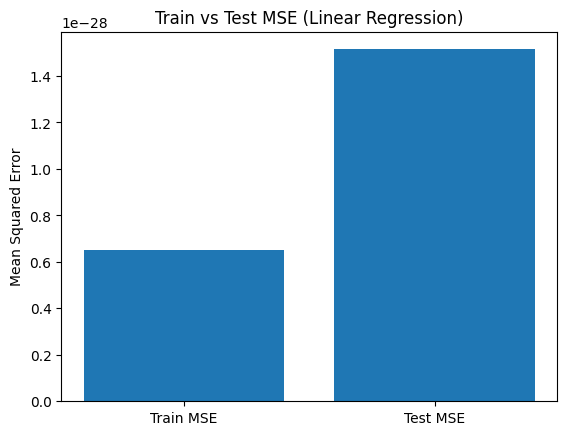

In [12]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

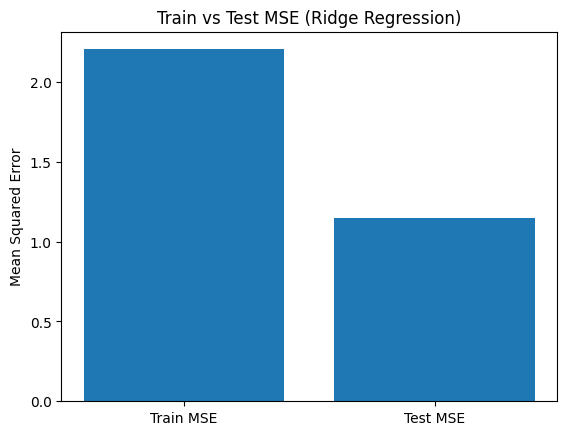

In [13]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_rid, test_mse_rid])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Ridge Regression)")
plt.show()

In [14]:
X_full = pd.DataFrame({
    "Area": np.linspace(df["Area"].min(), df ["Area"].max(), 100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms": df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_city": df["Distance_City"].mean()
})

In [16]:
X_full = X_full.rename(columns={'Distance_city': 'Distance_City'})
X_full_scaled = scaler.transform(X_full)
y_pred_line = linear.predict(X_full_scaled)

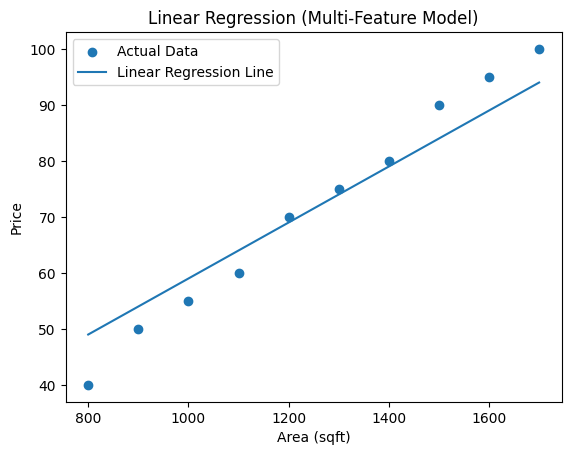

In [18]:
plt.scatter (df ["Area"], df ["Price"], label="Actual Data")
plt.plot(X_full["Area"], y_pred_line, label="Linear Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Linear Regression (Multi-Feature Model)")
plt.legend()
plt.show()

In [19]:
X_full_scaled = scaler.transform(X_full)
y_pred_line = ridge.predict(X_full_scaled)

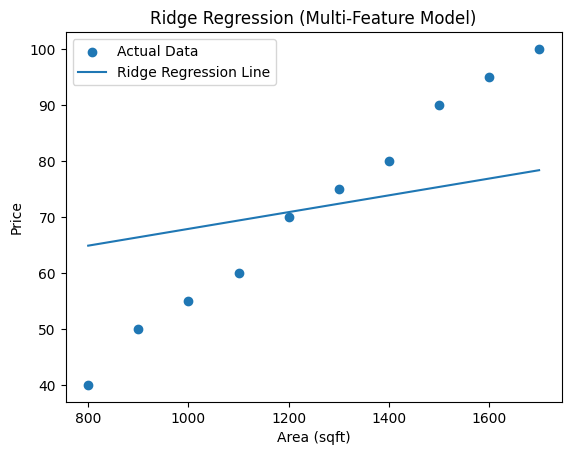

In [20]:
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_full["Area"], y_pred_line, label="Ridge Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("Ridge Regression (Multi-Feature Model)")
plt.legend()
plt.show()

### Lasso Regularization

In [21]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [24]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [26]:
Train_MSE_Lasso = mean_squared_error(y_train, y_train_pred)
Test_MSE_Lasso = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.25540026200111443
Test MSE: 0.709067116162119


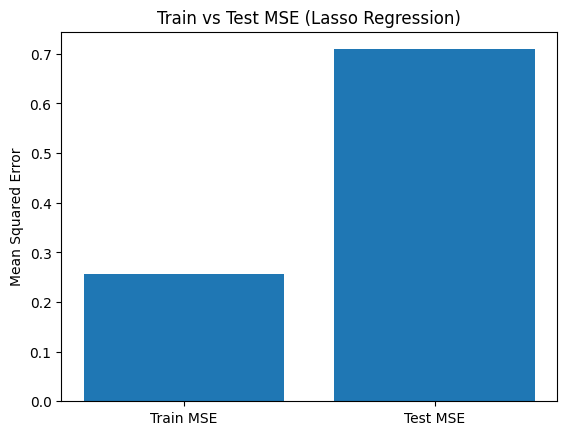

In [27]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Lasso Regression)")
plt.show()

In [29]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print(lasso_coefficients)

Area             12.589336
Bedrooms          3.507623
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.106779
dtype: float64


In [30]:
X_plot = pd.DataFrame({
    "Area": np.linspace(df["Area"].min(), df["Area"].max(), 100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms": df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_City": df["Distance_City"].mean()
})

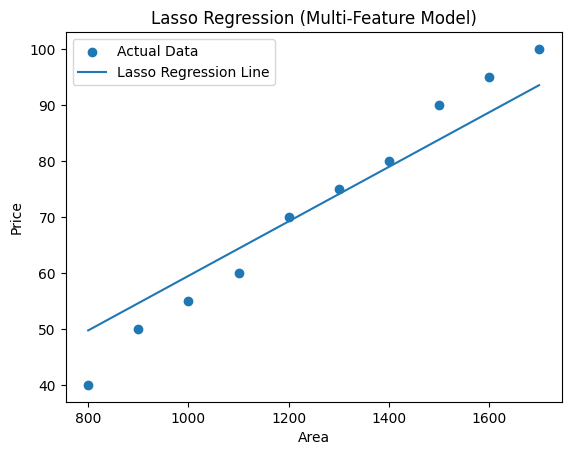

In [31]:
X_plot_scaled = scaler = scaler.transform(X_plot)
y_line = lasso.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature Model)")
plt.legend()
plt.show()